# Filters with KERAS Preprocessing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD

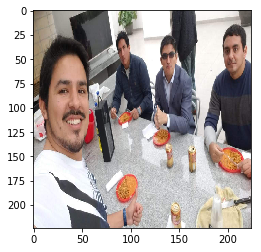

In [5]:
path_photo_a = 'snapshot/teamA.jpg'
photo_a = image.load_img(path_photo_a,target_size=(224,224))
plt.imshow(photo_a)

In [6]:
vgg16_model = VGG16(weights='imagenet', include_top=True)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
vgg16_model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [7]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
photo_a = image.img_to_array(photo_a)
photo_a = np.expand_dims(photo_a, axis=0)
photo_a = preprocess_input(photo_a)

In [9]:
model = Model(input=vgg16_model.input, 
              output=vgg16_model.get_layer('block1_pool').output)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

block1_pool_features = model.predict(photo_a)
block1_pool_features.shape

/Users/romelldominguez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


(1, 112, 112, 64)

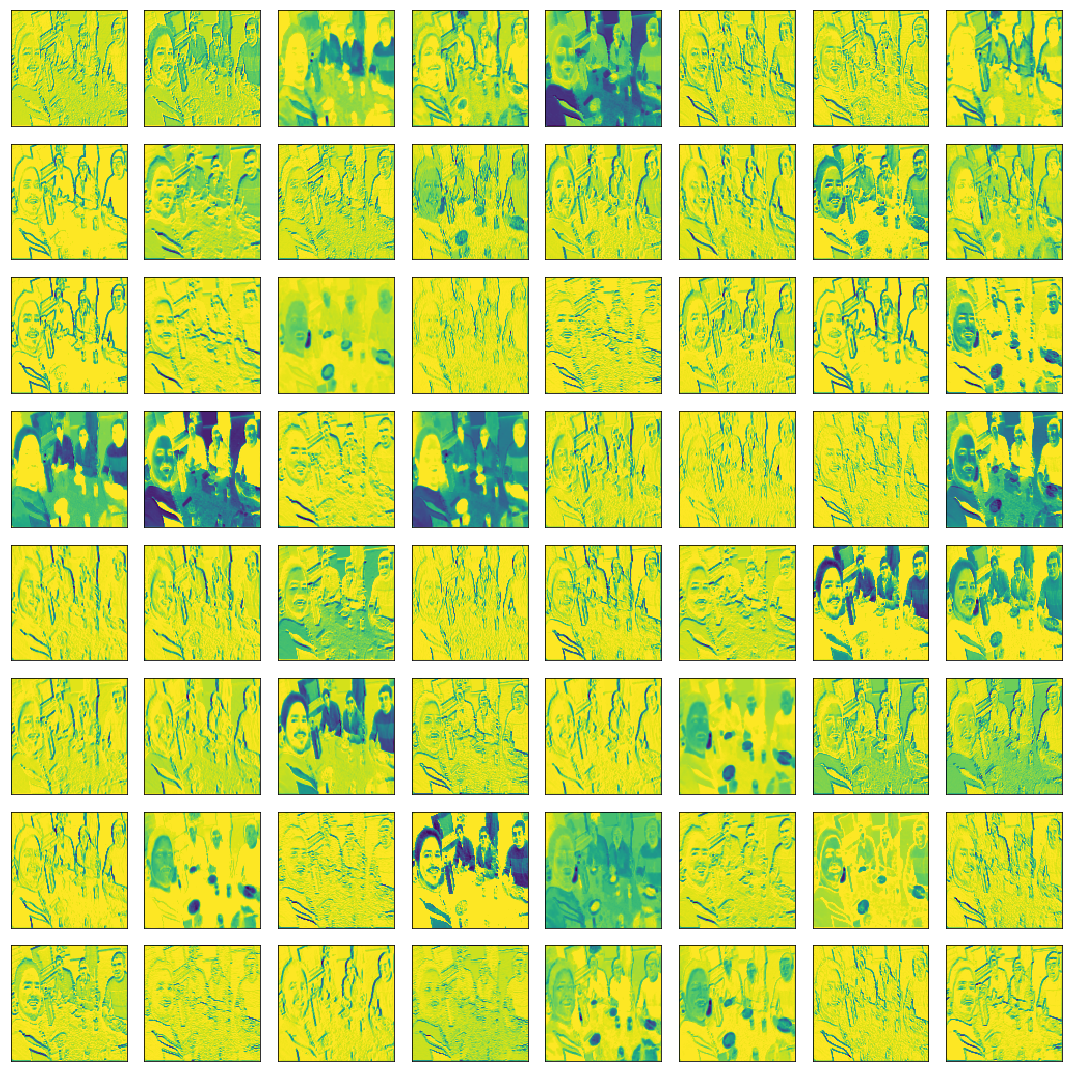

In [15]:
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
axes = np.ravel(axes)
for i in range(block1_pool_features.shape[3]):
    axes[i].imshow(255-block1_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [11]:
model2 = Model(input=vgg16_model.input, 
              output=vgg16_model.get_layer('block2_pool').output)
model2.compile(optimizer=sgd, loss='categorical_crossentropy')

block2_pool_features = model.predict(photo_a)
block2_pool_features.shape

/Users/romelldominguez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


(1, 112, 112, 64)

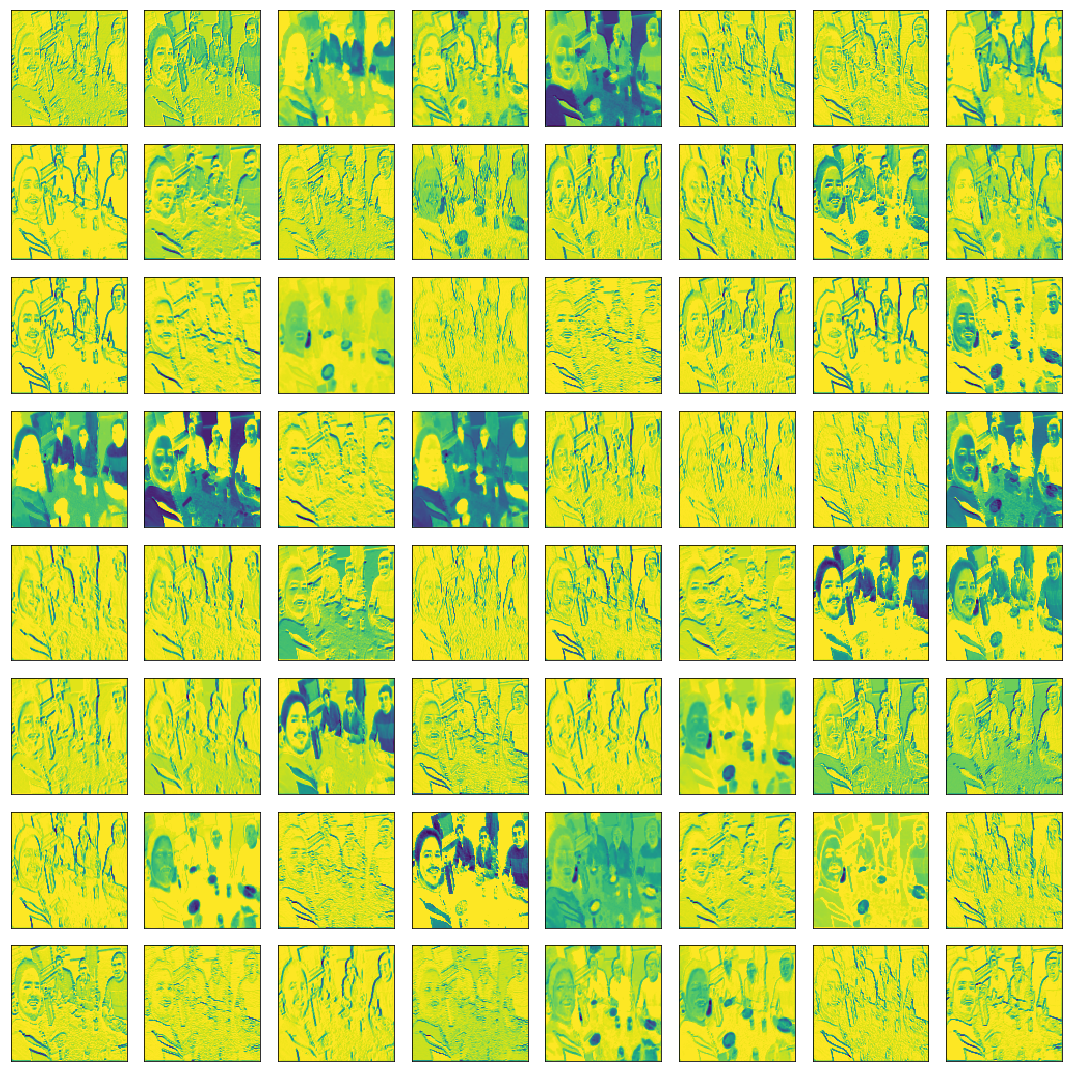

In [14]:
fig, axes = plt.subplots(8, 8, figsize=(15, 15))
axes = np.ravel(axes)
for i in range(block2_pool_features.shape[3]):
    axes[i].imshow(255-block2_pool_features[0, :, :, i], interpolation="nearest")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()